# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import matplotlib.pyplot as plt

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the world countries

country_geo = r'/Users/shailioza/Desktop/us-states.json'

In [4]:
import json

f = open(r'/Users/shailioza/Desktop/us-states.json')

# returns JSON object as a dictionary
data = json.load(f)

# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# Creating a path to import dataframe

path = r'/Users/shailioza/Documents/CareerFoundry Projects'

In [6]:
# Importing Dataframe 

df = pd.read_csv(os.path.join(path, 'pollution_clean.csv'))

In [7]:
df.head(5)

,Unnamed: 0,Date,Year,Month,Day,Address,State,County,City,O3 Mean,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,0,2000-01-01,2000,1,1,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.019765,...,23,25.0,3.000000,9.0,21,13.0,19.041667,49.0,19,46
1,1,2000-01-02,2000,1,2,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,...,0,26.0,1.958333,3.0,22,4.0,22.958333,36.0,19,34
2,2,2000-01-03,2000,1,3,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.009353,...,8,28.0,5.250000,11.0,19,16.0,38.125000,51.0,8,48
3,3,2000-01-04,2000,1,4,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.015882,...,23,34.0,7.083333,16.0,8,23.0,40.260870,74.0,8,72
4,4,2000-01-05,2000,1,5,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,0.007353,...,2,42.0,8.708333,15.0,7,21.0,48.450000,61.0,22,58


# Data Wrangling

In [8]:
# Drop specific unnecesary columns
columns_to_drop = ['Unnamed: 0','Month','Date', 'Day', 'Address', 'County','CO 1st Max Hour','SO2 1st Max Hour','NO2 1st Max Hour','O3 1st Max Hour']
df.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
df.shape

(607220, 15)

In [10]:
df.columns

Index(['Year', 'State', 'City', 'O3 Mean', 'O3 1st Max Value', 'O3 AQI',
       'CO Mean', 'CO 1st Max Value', 'CO AQI', 'SO2 Mean',
       'SO2 1st Max Value', 'SO2 AQI', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 AQI'],
      dtype='object')

In [11]:
# select only the necessary columns and put them in a list called columns
columns = ['Year', 'State', 'City','O3 Mean','CO Mean','SO2 Mean','NO2 Mean','CO AQI','O3 AQI','NO2 AQI','SO2 AQI']

In [12]:
# Create a subset

state_rec = df[columns]

In [13]:
state_rec.head()

,Year,State,City,O3 Mean,CO Mean,SO2 Mean,NO2 Mean,CO AQI,O3 AQI,NO2 AQI,SO2 AQI
0,2000,Arizona,Phoenix,0.019765,0.878947,3.000000,19.041667,25.0,37,46,13.0
1,2000,Arizona,Phoenix,0.015882,1.066667,1.958333,22.958333,26.0,30,34,4.0
2,2000,Arizona,Phoenix,0.009353,1.762500,5.250000,38.125000,28.0,15,48,16.0
3,2000,Arizona,Phoenix,0.015882,1.829167,7.083333,40.260870,34.0,31,72,23.0
4,2000,Arizona,Phoenix,0.007353,2.700000,8.708333,48.450000,42.0,11,58,21.0


# Consistency Checks

In [14]:
#check for missing values
state_rec.isnull().sum()

Year        0
State       0
City        0
O3 Mean     0
CO Mean     0
SO2 Mean    0
NO2 Mean    0
CO AQI      0
O3 AQI      0
NO2 AQI     0
SO2 AQI     0
dtype: int64

###### No missing values

In [15]:
#check for duplicates checks
dups = state_rec.duplicated()

In [16]:
dups.shape

(607220,)

##### No duplicates

<Axes: xlabel='CO Mean', ylabel='Count'>

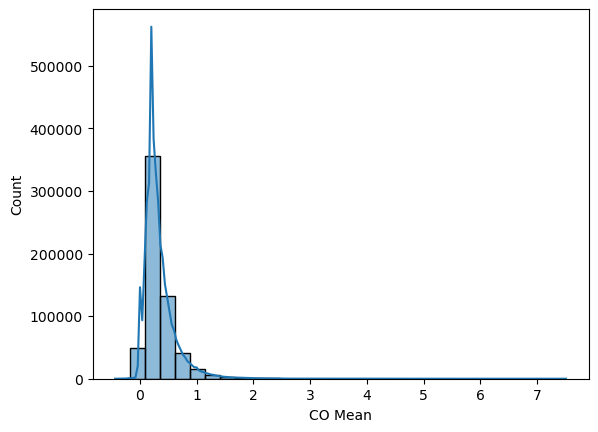

In [17]:
#extreme values checks
sns.histplot(state_rec['CO Mean'], bins=30, kde = True)

<Axes: xlabel='CO AQI', ylabel='Count'>

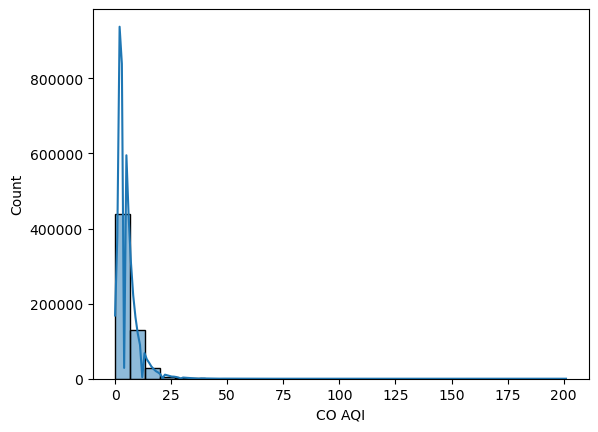

In [18]:
#extreme values checks
sns.histplot(state_rec['CO AQI'], bins=30, kde = True)

<Axes: xlabel='O3 Mean', ylabel='Count'>

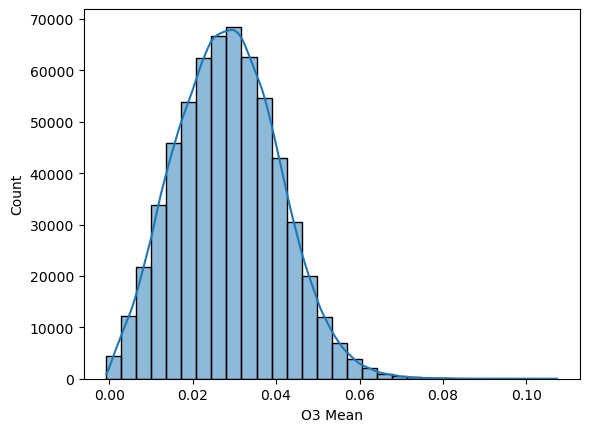

In [19]:
#extreme values checks
sns.histplot(state_rec['O3 Mean'], bins=30, kde = True)

<Axes: xlabel='O3 AQI', ylabel='Count'>

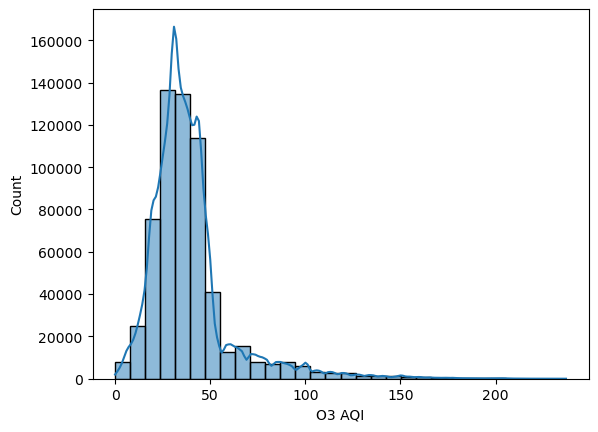

In [20]:
#extreme values checks
sns.histplot(state_rec['O3 AQI'], bins=30, kde = True)

<Axes: xlabel='NO2 Mean', ylabel='Count'>

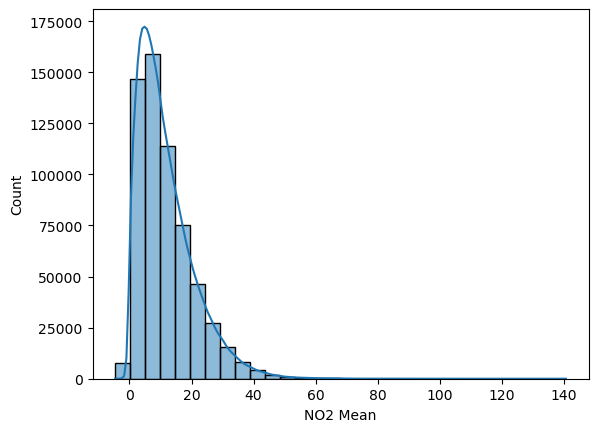

In [21]:
#extreme values checks
sns.histplot(state_rec['NO2 Mean'], bins=30, kde = True)

<Axes: xlabel='NO2 AQI', ylabel='Count'>

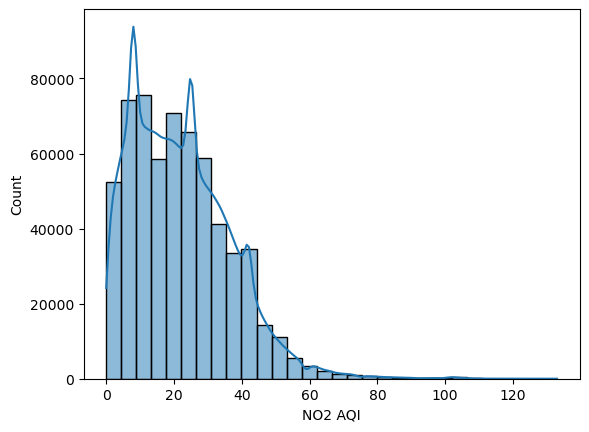

In [22]:
#extreme values checks
sns.histplot(state_rec['NO2 AQI'], bins=30, kde = True)

<Axes: xlabel='SO2 AQI', ylabel='Count'>

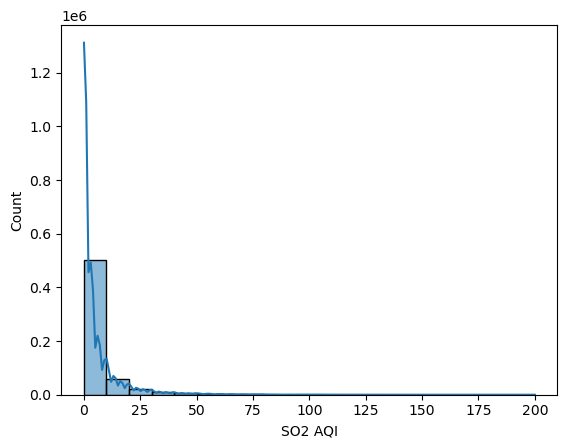

In [23]:
#extreme values checks
sns.histplot(state_rec['SO2 AQI'], bins=20, kde = True)

<Axes: xlabel='SO2 Mean', ylabel='Count'>

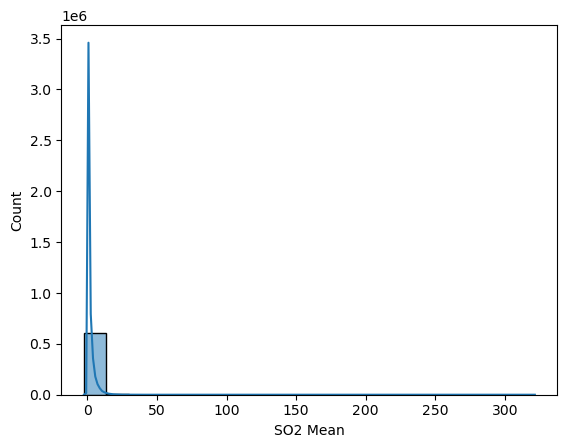

In [24]:
#extreme values checks
sns.histplot(state_rec['SO2 Mean'], bins=20, kde = True)

#### No extreme values seen in any graph

# Plotting a Choropleth

In [25]:
# Subset the data for the years 2010, 2015, 2018, 2020

df_poll_10 = state_rec[state_rec["Year"] == 2010]

df_poll_15 = state_rec[state_rec["Year"] == 2015]

df_poll_18 = state_rec[state_rec["Year"] == 2018]

df_poll_20 = state_rec[state_rec["Year"] == 2020]

In [26]:
df_poll_10.head()

,Year,State,City,O3 Mean,CO Mean,SO2 Mean,NO2 Mean,CO AQI,O3 AQI,NO2 AQI,SO2 AQI
246613,2010,Arizona,Phoenix,0.015235,0.973684,3.333333,32.208333,18.0,31,45,9.0
246614,2010,Arizona,Phoenix,0.011882,0.945833,4.083333,35.500000,15.0,23,48,10.0
246615,2010,Arizona,Phoenix,0.013176,0.895833,3.208333,33.166667,16.0,26,52,9.0
246616,2010,Arizona,Phoenix,0.015765,0.879167,3.791667,35.625000,15.0,33,52,13.0
246617,2010,Arizona,Phoenix,0.013529,0.925000,5.041667,42.708333,15.0,28,57,13.0


In [27]:
# Create a data frame with just the states and the variables we want plotted

data_to_plot1 = df_poll_10[['State','City','O3 AQI']]
data_to_plot1.head()

,State,City,O3 AQI
246613,Arizona,Phoenix,31
246614,Arizona,Phoenix,23
246615,Arizona,Phoenix,26
246616,Arizona,Phoenix,33
246617,Arizona,Phoenix,28


In [28]:
state_names = df['State'].unique()
for State in state_names:
    print(State)

Arizona
California
Colorado
District Of Columbia
Florida
Illinois
Indiana
Kansas
Kentucky
Louisiana
Michigan
Missouri
New Jersey
New York
North Carolina
Oklahoma
Pennsylvania
Texas
Virginia
Washington
Wisconsin
Massachusetts
Nevada
New Hampshire
Tennessee
South Carolina
Connecticut
Iowa
Maine
Maryland
Arkansas
Oregon
Wyoming
North Dakota
Idaho
Ohio
Georgia
Delaware
Hawaii
Minnesota
New Mexico
Rhode Island
South Dakota
Utah
Alabama
Alaska
Mississippi
Vermont


In [29]:
# Setup a folium map at a high-level zoom
map1 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot1,
    columns = ['State', 'O3 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "O3 AQI").add_to(map1)
folium.LayerControl().add_to(map1)

map1

#### In 2010, maximum zone gas pollution is observed in Virginia, Ohio, Texas, Tennesse and Indiana. However, we cannot say for sure if these states have the maximum pollution as there is no data for the states colored gray. 

In [30]:
data_to_plot2 = df_poll_10[['State','CO AQI']]
data_to_plot2.head()

# Setup a folium map at a high-level zoom
map2 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot2,
    columns = ['State', 'CO AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "CO AQI").add_to(map2)
folium.LayerControl().add_to(map2)

map2

#### In 2010, maximum carbon monoxide pollutant is observed in Colorado, California and Utah. However, we cannot say for sure if these states have the highest pollution because there are some states for which there is no data (colored gray).

In [31]:
data_to_plot3 = df_poll_10[['State','NO2 AQI']]
data_to_plot3.head()



,State,NO2 AQI
246613,Arizona,45
246614,Arizona,48
246615,Arizona,52
246616,Arizona,52
246617,Arizona,57


In [32]:
# Setup a folium map at a high-level zoom
map3 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot3,
    columns = ['State', 'NO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2 AQI").add_to(map3)
folium.LayerControl().add_to(map3)

map3

#### In 2010, maximum Nitrogen Dioxide pollution is recorded in Connecticut, Massachussetts, Maryland, North Carolina, Indiana, and Colorado; but just like in other pollutants, there are not enough data points to conclude that these states have highest NO2 pollution. 

In [33]:
data_to_plot4 = df_poll_10[['State','SO2 AQI']]
data_to_plot4.head()

# Setup a folium map at a high-level zoom
map4 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot4,
    columns = ['State', 'SO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "CO AQI").add_to(map4)
folium.LayerControl().add_to(map4)

map4

In [34]:
df_poll_15.head()

,Year,State,City,O3 Mean,CO Mean,SO2 Mean,NO2 Mean,CO AQI,O3 AQI,NO2 AQI,SO2 AQI
401872,2015,Alabama,Birmingham,0.016118,0.229412,1.483333,13.916667,3.0,21,21,3.0
401873,2015,Alabama,Birmingham,0.011813,0.216667,0.700000,8.975000,3.0,15,15,1.0
401874,2015,Alabama,Birmingham,0.009588,0.270833,0.877273,14.162500,3.0,16,17,3.0
401875,2015,Alabama,Birmingham,0.019294,0.087500,0.244444,5.270833,2.0,21,10,1.0
401876,2015,Alabama,Birmingham,0.037059,0.129167,0.140909,3.225000,2.0,37,4,0.0


In [35]:
# Create a data frame with just the states and the variables we want plotted

data_to_plot3 = df_poll_15[['State','O3 AQI']]
data_to_plot3.head()

,State,O3 AQI
401872,Alabama,21
401873,Alabama,15
401874,Alabama,16
401875,Alabama,21
401876,Alabama,37


In [36]:
# Setup a folium map at a high-level zoom
map3 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot1,
    columns = ['State', 'O3 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "O3 AQI").add_to(map3)
folium.LayerControl().add_to(map3)

map3

In [37]:
data_to_plot4 = df_poll_15[['State','CO AQI']]
data_to_plot4.head()

# Setup a folium map at a high-level zoom
map4 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot4,
    columns = ['State', 'CO AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "CO AQI").add_to(map4)
folium.LayerControl().add_to(map4)

map4

In [38]:
data_to_plot5 = df_poll_20[['State','CO AQI']]
data_to_plot5.head()

# Setup a folium map at a high-level zoom
map5 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot5,
    columns = ['State', 'CO AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "CO AQI").add_to(map5)
folium.LayerControl().add_to(map5)

map5

## Compared to previous years, CO pollution decreased in Colorado in 2020, however, California still seems to have high CO gas in atmosphere. This change could be due to COVID-19 lockdown protocols which were implemented in 2019. 

#### This theory can be confirmed by charting the same pollutant for the year 2018

In [39]:
data_to_plot6 = df_poll_18[['State','CO AQI']]
data_to_plot6.head()

# Setup a folium map at a high-level zoom
map6 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot6,
    columns = ['State', 'CO AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "CO AQI").add_to(map6)
folium.LayerControl().add_to(map6)

map6

#### 2018 records show highes CO pollution in Utah and New York

In [40]:
data_to_plot7 = df_poll_15[['State','O3 AQI']]
data_to_plot7.head()


# Setup a folium map at a high-level zoom
map7 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot7,
    columns = ['State', 'O3 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "O3 AQI").add_to(map7)
folium.LayerControl().add_to(map7)

map7

#### In 2015, maximum ozone in air is observed in Wyoming, Nevada, South Dakota, Iowa, New Mexico and Texas.

In [41]:
data_to_plot8 = df_poll_20[['State','O3 AQI']]
data_to_plot8.head()


# Setup a folium map at a high-level zoom
map8 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot8,
    columns = ['State', 'O3 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "O3 AQI").add_to(map8)
folium.LayerControl().add_to(map8)

map8

## 2020 shows considerable reduction in air pollution in the entire US compared to 2015. To check the effects of COVID-19 lockdown, we will plot graph for 2018 and confirm.

In [42]:
data_to_plot9 = df_poll_18[['State','O3 AQI']]
data_to_plot9.head()


# Setup a folium map at a high-level zoom
map9 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot9,
    columns = ['State', 'O3 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "O3 AQI").add_to(map9)
folium.LayerControl().add_to(map9)

map9

### 2018 shows very high rate of pollution in all states, with most polluted states being Florida, Virginia, Pennsylvania, South Dakota, Arizona, Nevada and Oregon. All these states show highest range of AQI.

### We can also conclude that Ozone pollution has only increased over the years (from 2000 to 2018) with a drastic drop in 2020. 

In [43]:
data_to_plot10 = df_poll_10[['State','NO2 AQI']]

# Setup a folium map at a high-level zoom
map10 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot10,
    columns = ['State', 'NO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2 AQI").add_to(map10)
folium.LayerControl().add_to(map10)

map10

In [44]:
data_to_plot11 = df_poll_15[['State','NO2 AQI']]

# Setup a folium map at a high-level zoom
map11 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot11,
    columns = ['State', 'NO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2 AQI").add_to(map11)
folium.LayerControl().add_to(map11)

map11

In [45]:
data_to_plot12 = df_poll_18[['State','NO2 AQI']]

# Setup a folium map at a high-level zoom
map12 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot12,
    columns = ['State', 'NO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2 AQI").add_to(map12)
folium.LayerControl().add_to(map12)

map12

In [46]:
data_to_plot13 = df_poll_20[['State','NO2 AQI']]

# Setup a folium map at a high-level zoom
map13 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot13,
    columns = ['State', 'NO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2 AQI").add_to(map13)
folium.LayerControl().add_to(map13)

map13

In [47]:
data_to_plot14 = df_poll_10[['State','SO2 AQI']]

# Setup a folium map at a high-level zoom
map14 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot14,
    columns = ['State', 'SO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2 AQI").add_to(map14)
folium.LayerControl().add_to(map14)

map14

In [48]:
data_to_plot15 = df_poll_15[['State','SO2 AQI']]

# Setup a folium map at a high-level zoom
map15 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot15,
    columns = ['State', 'SO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2 AQI").add_to(map15)
folium.LayerControl().add_to(map15)

map15

In [49]:
data_to_plot16 = df_poll_18[['State','SO2 AQI']]

# Setup a folium map at a high-level zoom
map16 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot16,
    columns = ['State', 'SO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2 AQI").add_to(map16)
folium.LayerControl().add_to(map16)

map16

In [50]:
data_to_plot17 = df_poll_20[['State','SO2 AQI']]

# Setup a folium map at a high-level zoom
map17 = folium.Map(location = [100, 0], zoom_start = 1.0)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot17,
    columns = ['State', 'SO2 AQI'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "NO2 AQI").add_to(map17)
folium.LayerControl().add_to(map17)

map17

### This way, we can plot choropleth maps for all years showing desired pollutants in each state and derive some conclusions. 
### I feel this process would be easier and quicker in Tableau, than Python.

## Discuss the results

##### Does the analysis answer any of your existing research questions?

Hypothesis: The levels of specific air pollutants have changed over time.
Yes, there have been significant changes in O3 and CO gases in the atmosphere over the years due to industrialization and increased use of private vehicles (burning of fuel). 

Where - Which states have the highest pollutants?
States like California, Colorado, New York, Utah, Nevada, show highest pollutants over the years. 

When - What are the pollution trends across 2 decades? Monitor effects of COVID-19 lockdown, fuel prices, etc.
There does seem to be a reduction in air pollutants in the year 2020, compared to 2018. This signifies that the epidemic and economic crisis has has an indirect effect on air pollution. 

##### Does the analysis lead you to any new research questions?
No 
